In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 


In [18]:
data = pd.read_csv("Dataset/mnist_train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [12]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    B1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    B2 = np.random.rand(10, 1) - 0.5
    
    return W1, B1, W2, B2

def ReLu(Z):
    return np.maximum(Z,0)

def softMax(Z):
    return np.exp(Z) / sum(np.exp(Z))

def forward_prop(W1, B1, W2, B2, X):
    Z1 = W1.dot(X) + B1
    A1 = ReLu(Z1)
    Z2 = W2.dot(A1) + B2
    A2 = softMax(Z2)
    
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLu(Z):
    return Z > 0

def back_prop(Z1, A1, Z2, A2,W1, W2, X, Y):
    _,m = X_train.shape
    one_hot_Y = one_hot(Y)
    
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    
    dB2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLu(Z1)
    
    dW1 = 1/m * dZ1.dot(X.T)
    dB1 = 1/m * np.sum(dZ1,axis=1, keepdims=True)
    
    return dW1, dB1, dW2, dB2

def update_params(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha):
    W1 = W1 - alpha * dW1
    B1 = B1 - alpha * dB1
    W2 = W2 - alpha * dW2
    B2 = B2 - alpha * dB2
    
    return W1, B1, W2, B2


In [20]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X,Y,alpha,iterations):
    W1,B1,W2,B2 = init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2 = forward_prop(W1,B1,W2,B2,X)
        dW1,dB1,dW2,dB2 = back_prop(Z1,A1,Z2,A2,W1,W2,X,Y)
        W1,B1,W2,B2 = update_params(W1,B1,W2,B2,dW1,dB1,dW2,dB2,alpha)
        
        if i%50 == 0:
            print("iteration : ",i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    
    return W1,B1,W2,B2

In [21]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

iteration :  0
[3 3 4 ... 8 7 8] [5 3 6 ... 1 5 6]
0.09480487804878049
iteration :  50
[3 3 6 ... 1 5 6] [5 3 6 ... 1 5 6]
0.4651707317073171
iteration :  100
[2 3 6 ... 1 5 6] [5 3 6 ... 1 5 6]
0.6502926829268293
iteration :  150
[2 3 6 ... 1 5 6] [5 3 6 ... 1 5 6]
0.7299024390243902
iteration :  200
[2 3 6 ... 1 5 6] [5 3 6 ... 1 5 6]
0.7713414634146342
iteration :  250
[2 3 6 ... 1 5 6] [5 3 6 ... 1 5 6]
0.796219512195122
iteration :  300
[2 3 6 ... 1 5 6] [5 3 6 ... 1 5 6]
0.8122439024390244
iteration :  350
[2 3 6 ... 1 5 6] [5 3 6 ... 1 5 6]
0.824780487804878
iteration :  400
[2 3 6 ... 1 5 6] [5 3 6 ... 1 5 6]
0.8348780487804878
iteration :  450
[2 3 6 ... 1 5 6] [5 3 6 ... 1 5 6]
0.8427560975609756


In [22]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


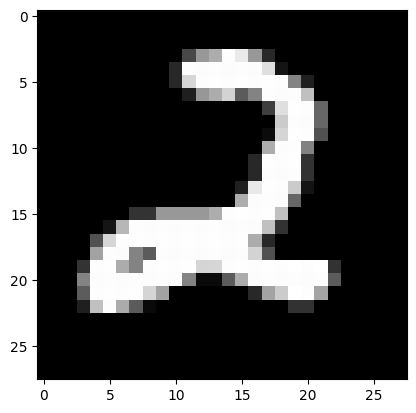

Prediction:  [1]
Label:  1


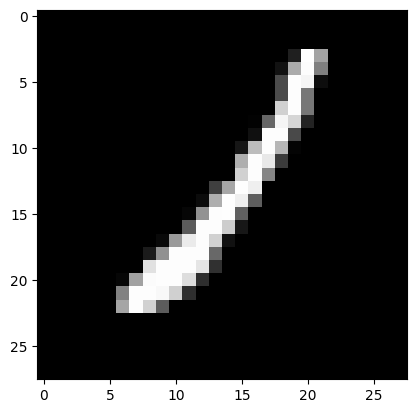

Prediction:  [9]
Label:  9


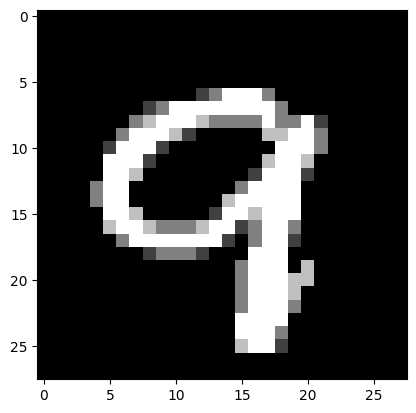

Prediction:  [6]
Label:  6


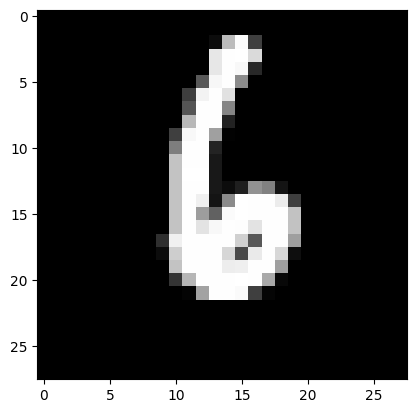

Prediction:  [8]
Label:  8


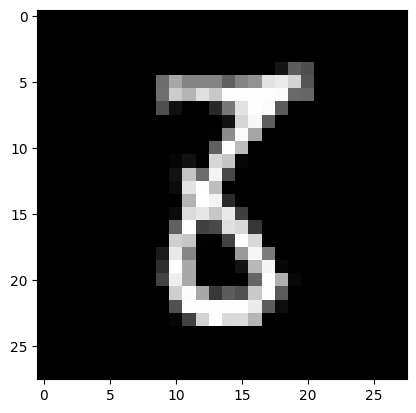

In [23]:
test_prediction(93, W1, b1, W2, b2)
test_prediction(94, W1, b1, W2, b2)
test_prediction(95, W1, b1, W2, b2)
test_prediction(96, W1, b1, W2, b2)
test_prediction(111, W1, b1, W2, b2)
